# Project: Investigate No-show appointments Dataset of Bolsa_Família
## Table of Contents
this dataset contains 110.527 medical appointments with 14 feature for each appointment. The most important one if the patient shown at the appointment day or not. feature names has meaningful captions.
scholarship column states if that appointment have subsidy from Gov or not.
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">Limitations</a></li>
</ul>

<h1>We will Try to answer the following questions:</h1>
<b>Q1) What is the number of shown appointements and not-shown ones?<br>
Q2) Is handicap patients did not show for their appointments?<br>
Q3) Sms reminder always have a positive effect to make patients shown for their     appointment, why not sending sms's for all appointments?,lets see if this       can increse the shown percentage?<br>
Q4) Is there a specific gender or age that misses thier appointments?<br>
Q5) Does The delay between scheduling date and the appointment date affecting the shown status?</b>

In [1]:
# import statements for all of the packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
# import No-Show Dataset and view head
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv'
df = pd.read_csv(url)
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


<a id='wrangling'></a>
## Data Wrangling

### General Properties
Standardize typing for all column names , all small chars , with _ instead of -
and change no-show column to shown to be more expressive

In [3]:
df.rename(columns = lambda x: x.lower().replace('-','_'),inplace=True)
df.rename(columns = {'no_show':'shown'},inplace=True)
df.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,shown
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


<b>change no-show values to be suitable for the new column name (shown) as to be shown or not (1 or 0)</b>

In [4]:
df.shown.replace('Yes',0,inplace=True)
df.shown.replace('No',1,inplace=True)

In [5]:
df.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,shown
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patientid         110527 non-null float64
appointmentid     110527 non-null int64
gender            110527 non-null object
scheduledday      110527 non-null object
appointmentday    110527 non-null object
age               110527 non-null int64
neighbourhood     110527 non-null object
scholarship       110527 non-null int64
hipertension      110527 non-null int64
diabetes          110527 non-null int64
alcoholism        110527 non-null int64
handcap           110527 non-null int64
sms_received      110527 non-null int64
shown             110527 non-null int64
dtypes: float64(1), int64(9), object(4)
memory usage: 11.8+ MB


<b>The index column has a float datatype which is not the correct type for IDs.
The other int64 columns of these columns ('scholarship','hipertension','diabetes','alcoholism','sms_received','shown')
    is to be boolean to be more expressive and meaningful.</b>

In [7]:
#change columns datatypes including index(patientid)
df['patientid'] = df['patientid'].astype('int64').astype('str').str.replace('.0','')
df['appointmentid'] = df['appointmentid'].astype('str')
df[['scholarship','hipertension','diabetes','alcoholism','sms_received','shown']] = df[['scholarship','hipertension','diabetes','alcoholism','sms_received','shown']].astype('bool')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patientid         110527 non-null object
appointmentid     110527 non-null object
gender            110527 non-null object
scheduledday      110527 non-null object
appointmentday    110527 non-null object
age               110527 non-null int64
neighbourhood     110527 non-null object
scholarship       110527 non-null bool
hipertension      110527 non-null bool
diabetes          110527 non-null bool
alcoholism        110527 non-null bool
handcap           110527 non-null int64
sms_received      110527 non-null bool
shown             110527 non-null bool
dtypes: bool(6), int64(2), object(6)
memory usage: 7.4+ MB


In [8]:
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,shown
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,False,True,False,False,0,False,True
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,False,False,False,False,0,False,True
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,False,False,False,False,0,False,True
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,False,False,False,False,0,False,True
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,False,True,True,False,0,False,True


In [9]:
df['appointmentday'].unique()

array(['2016-04-29T00:00:00Z', '2016-05-03T00:00:00Z',
       '2016-05-10T00:00:00Z', '2016-05-17T00:00:00Z',
       '2016-05-24T00:00:00Z', '2016-05-31T00:00:00Z',
       '2016-05-02T00:00:00Z', '2016-05-30T00:00:00Z',
       '2016-05-16T00:00:00Z', '2016-05-04T00:00:00Z',
       '2016-05-19T00:00:00Z', '2016-05-12T00:00:00Z',
       '2016-05-06T00:00:00Z', '2016-05-20T00:00:00Z',
       '2016-05-05T00:00:00Z', '2016-05-13T00:00:00Z',
       '2016-05-09T00:00:00Z', '2016-05-25T00:00:00Z',
       '2016-05-11T00:00:00Z', '2016-05-18T00:00:00Z',
       '2016-05-14T00:00:00Z', '2016-06-02T00:00:00Z',
       '2016-06-03T00:00:00Z', '2016-06-06T00:00:00Z',
       '2016-06-07T00:00:00Z', '2016-06-01T00:00:00Z',
       '2016-06-08T00:00:00Z'], dtype=object)

In [10]:
df['scheduledday'].unique()

array(['2016-04-29T18:38:08Z', '2016-04-29T16:08:27Z',
       '2016-04-29T16:19:04Z', ..., '2016-04-27T16:03:52Z',
       '2016-04-27T15:09:23Z', '2016-04-27T13:30:56Z'], dtype=object)

<b>Converting the appointmentday,scheduledday columns to datetime as it should be for time calculations later in the analysis process</b>

In [11]:
#convert scheduledday , appointmentday columns to datetime dtype
#df['appointmentday'] =pd.to_datetime(df['appointmentday'])
#df['scheduledday'] =pd.to_datetime(df['scheduledday'])
#for code simplicity using for loop
for date_col in ['scheduledday' , 'appointmentday']:
        df[date_col] = pd.to_datetime(df[date_col])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patientid         110527 non-null object
appointmentid     110527 non-null object
gender            110527 non-null object
scheduledday      110527 non-null datetime64[ns]
appointmentday    110527 non-null datetime64[ns]
age               110527 non-null int64
neighbourhood     110527 non-null object
scholarship       110527 non-null bool
hipertension      110527 non-null bool
diabetes          110527 non-null bool
alcoholism        110527 non-null bool
handcap           110527 non-null int64
sms_received      110527 non-null bool
shown             110527 non-null bool
dtypes: bool(6), datetime64[ns](2), int64(2), object(4)
memory usage: 7.4+ MB


In [13]:
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,shown
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,0,False,True
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,0,False,True
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,False,False,False,False,0,False,True
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,0,False,True
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,0,False,True


<b> The appointment and the schedule periods of the dataset sample </b>

In [14]:
df['appointmentday'].dt.year.value_counts()

2016    110527
Name: appointmentday, dtype: int64

<b>This shows that the whole appointments is in 2016, the appointment sample is for one year, lets in depth see the distribution of the appointments through this year's months.</b>

In [15]:
df['appointmentday'].dt.month.unique()

array([4, 5, 6])

<b> the sample only contains three months of year 2016 which is a limited sample,<br> lets see when the patients schedule these appoitments and the distribution of the scheduled dates </b>

In [16]:
df['scheduledday'].dt.year.value_counts()

2016    110465
2015        62
Name: scheduledday, dtype: int64

<b> The scheduled dates are happened almost as appointment dates in 2016, just 62 scheduled dates in 2015<br> lets see the distribution of the scheduling months in 2016 year </b>

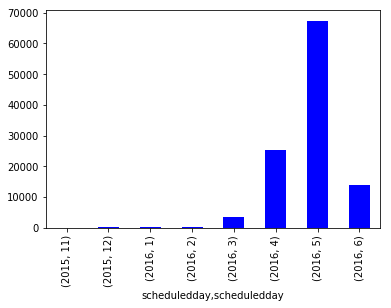

In [17]:
df.groupby([df['scheduledday'].dt.year,df['scheduledday'].dt.month]).count().plot(kind='bar',color='b',legend=False);

<b> The schedling operations are distributed through year 2015 ,2016<br> with ver very small part of the sample in 2015 which has no effect on our analysis,<br> the whole scheduling process done through jan to june 2016 with most in may  </b>

### Data Cleaning

In [18]:
#dataset description
df.describe(include='all')

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,shown
count,110527,110527,110527,110527,110527,110527.000000,110527,110527,110527,110527,110527,110527.000000,110527,110527
unique,62299,110527,2,103549,27,NaN,81,2,2,2,2,NaN,2,2
top,822145925426128,5732805,F,2016-05-06 07:09:54,2016-06-06 00:00:00,NaN,JARDIM CAMBURI,False,False,False,False,NaN,False,True
freq,88,1,71840,24,4692,NaN,7717,99666,88726,102584,107167,NaN,75045,88208
first,NaN,NaN,NaN,2015-11-10 07:13:56,2016-04-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2016-06-08 20:07:23,2016-06-08 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,37.088874,NaN,NaN,NaN,NaN,NaN,0.022248,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,23.110205,NaN,NaN,NaN,NaN,NaN,0.161543,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,-1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN


In [19]:
#from the description there is an invalid age (-1) in just one row, will drop it
df.drop(df[df.age < 0].index,inplace=True)

In [20]:
#is there any dublicates?
df.duplicated().sum()

0

In [21]:
#this to check if any patients with age 0 is alcholism - to be dropped 
# as it is a non-sense situation
df.query('alcoholism == True and age == 0')

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,shown


<a id='eda'></a>
## Exploratory Data Analysis

### What is the most features affects patients no show?

In [22]:
#correlaction between features
df.corr()

,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,shown
age,1.000000,-0.092463,0.504586,0.292391,0.095810,0.078032,0.012633,0.060327
scholarship,-0.092463,1.000000,-0.019730,-0.024894,0.035022,-0.008587,0.001192,-0.029134
hipertension,0.504586,-0.019730,1.000000,0.433085,0.087970,0.080083,-0.006270,0.035704
diabetes,0.292391,-0.024894,0.433085,1.000000,0.018473,0.057530,-0.014552,0.015181
alcoholism,0.095810,0.035022,0.087970,0.018473,1.000000,0.004647,-0.026149,0.000197
handcap,0.078032,-0.008587,0.080083,0.057530,0.004647,1.000000,-0.024162,0.006077
sms_received,0.012633,0.001192,-0.006270,-0.014552,-0.026149,-0.024162,1.000000,-0.126428
shown,0.060327,-0.029134,0.035704,0.015181,0.000197,0.006077,-0.126428,1.000000


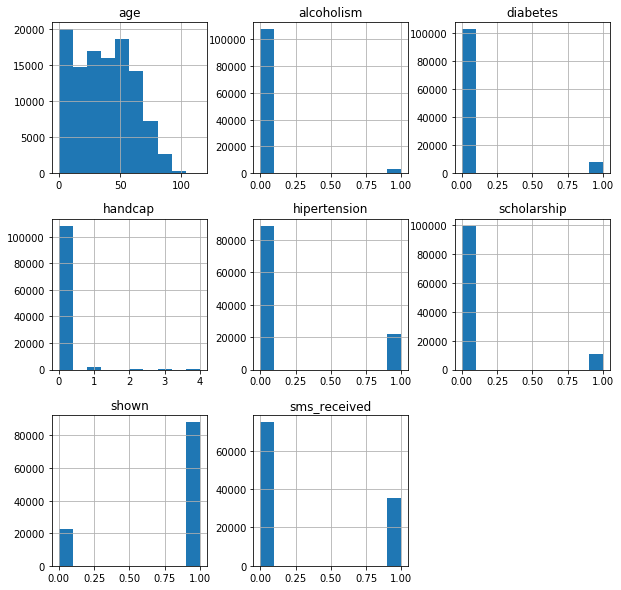

In [23]:
df.hist(figsize=(10,10));

<b><u>Question 1</u><br>
    What is the number of shown appointements and not-shown ones?</b>

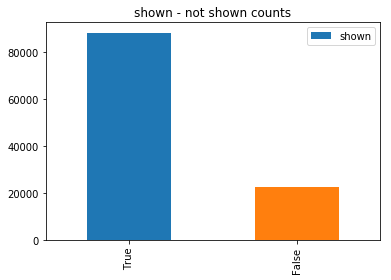

In [24]:
df.shown.value_counts().plot(kind='bar',title='shown - not shown counts',legend=True);

<b><u>Question 2:</u><br> Does patients handicap status has an effect on shown status?</b>

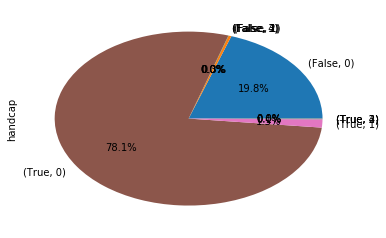

In [25]:
df.groupby('shown')['handcap'].value_counts().plot(kind='pie',autopct='%1.1f%%');

<b>the pie chart shows that 78.2% of all patients without handicap shown at the appointment day, 19.8% without handcap not shown.<br>
the all handicap status 1 ,2 ,3 , 4 are representing small effect (2%) on the shown status of the all patients</b>

<b><u>Question 3</u><br>
Sms reminder laways have a positive effect to make patients shown for their appointment, why not sending sms's for all appointments?<br>
lets see if this can increse the shown percentage?</b>

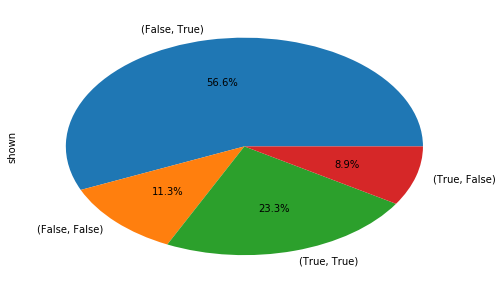

In [26]:
# does sms recivied affects patients show?
df.groupby('sms_received')['shown'].value_counts().plot(kind='pie',figsize=(8,5),autopct='%1.1f%%');

<b>this shows that the most shown patients did not recieve sms, then this feature is not as it would be and sending more sms to all patients will be a waste of money!</b>

<b><u>Qusetion 4:</u><br> Is there a specific gender or age that misses thier appointments?</b>

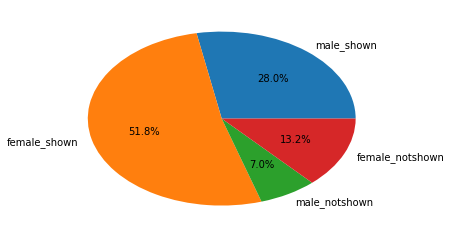

In [27]:
male_shown = len(df[(df['gender'] == 'M') & (df['shown'] == True)])
female_shown = len(df[(df['gender'] == 'F') & (df['shown'] == True)])
male_notshown = len(df[(df['gender'] == 'M') & (df['shown'] == False)])
female_notshown = len(df[(df['gender'] == 'F') & (df['shown'] == False)])
plt.pie([male_shown,female_shown,male_notshown,female_notshown],labels=['male_shown','female_shown','male_notshown','female_notshown'],autopct='%1.1f%%');

<b>Female were the most commited to their appointments.
this leads us to see the distribution of the Gender of the dataset
</b>

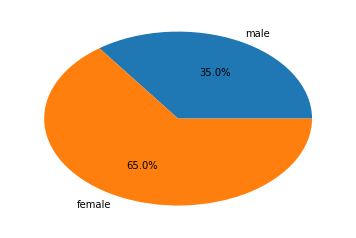

In [28]:
male = len(df[df['gender'] == 'M'])
female = len(df[df['gender'] == 'F'])
plt.pie([male,female],labels=['male','female'],autopct='%1.1f%%');

<b>Females are the most of the patients in the dataset 65%,<br> so the shown status is not correlated to specific gender as this feature is biased.</b>

<b><u>Question 5:</u><br>
    Does The delay between scheduling date and the appointment date affecting the shown status? ,Do patients with no dealy shown for their appointments?</b>

In [29]:
# the effect of timedelta between schedule day and the appointment day on the patient shown
df['time_diff'] = (df['appointmentday']-df['scheduledday']).dt.days

In [30]:
#the new time diff column ,
df.time_diff.describe()

count    110526.000000
mean          9.183794
std          15.255034
min          -7.000000
25%          -1.000000
50%           3.000000
75%          14.000000
max         178.000000
Name: time_diff, dtype: float64

<b>The new time diff column contains invalid values there is some sched. days
are before the appointment days, which is nonesense.<br> lets first see the rows of -1 time diff as it shows the most value</b>

In [31]:
df.query('time_diff == -1')

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,shown,time_diff
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,0,False,True,-1
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,0,False,True,-1
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,False,False,False,False,0,False,True,-1
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,0,False,True,-1
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,0,False,True,-1
8,56394729949972,5638447,F,2016-04-29 08:02:16,2016-04-29,21,ANDORINHAS,False,False,False,False,0,False,True,-1
19,7223289184215,5640433,F,2016-04-29 10:43:14,2016-04-29,46,DA PENHA,False,False,False,False,0,False,True,-1
24,8734857996885,5641780,F,2016-04-29 14:19:19,2016-04-29,65,TABUAZEIRO,False,False,False,False,0,False,True,-1
26,25787851512,5641781,F,2016-04-29 14:19:42,2016-04-29,45,BENTO FERREIRA,False,True,False,False,0,False,True,-1
28,5926171692527,5642400,M,2016-04-29 15:48:02,2016-04-29,51,SÃO PEDRO,False,False,False,False,0,False,True,-1


<b>It seems that this -1 time_diff is about some hourse not in days<br> as the sched day and appt day are the same date so we will reassign it to 0 days diff</b>

In [32]:
df.time_diff.replace(-1,0,inplace=True)

In [33]:
#check againn for time_diff <= -1
df.query('time_diff <= -1')

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,shown,time_diff
27033,7839272661752,5679978,M,2016-05-10 10:51:53,2016-05-09,38,RESISTÊNCIA,False,False,False,False,1,False,False,-2
55226,7896293967868,5715660,F,2016-05-18 14:50:41,2016-05-17,19,SANTO ANTÔNIO,False,False,False,False,1,False,False,-2
64175,24252258389979,5664962,F,2016-05-05 13:43:58,2016-05-04,22,CONSOLAÇÃO,False,False,False,False,0,False,False,-2
71533,998231581612122,5686628,F,2016-05-11 13:49:20,2016-05-05,81,SANTO ANTÔNIO,False,False,False,False,0,False,False,-7
72362,3787481966821,5655637,M,2016-05-04 06:50:57,2016-05-03,7,TABUAZEIRO,False,False,False,False,0,False,False,-2


In [34]:
#the rows with time_diff < -1 will be dropped as they are few and has no effect on the analysis
df = df[df['time_diff']>=0]
df['time_diff'].describe()

count    110521.000000
mean          9.533256
std          15.027972
min           0.000000
25%           0.000000
50%           3.000000
75%          14.000000
max         178.000000
Name: time_diff, dtype: float64

<b><u>Question 5:</u><br>Does The delay between scheduling date and the appointment date affecting the shown status?</b

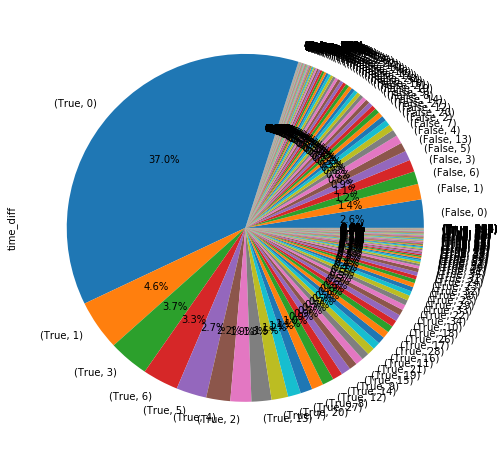

In [35]:
# what is the time_diff effect on the patients shown status?
df.groupby('shown')['time_diff'].value_counts(sort=True).plot(kind='pie',autopct='%1.1f%%',figsize=(8,8));

<b>the last pie shart shows that the time diff betwn the sched day and the appoint day has the most effect till now on the shown status of the patients as 37% (of all patients) shown at the appointment the same day they had scheduled.
while just 2.6% that not shown with the same time diff.<b><br>
    <b><u>We also can notice that:<br> the more delay days the less percent of appoitns shown.<br> the more delay days the more not-shown status percent increase</u></b>

<a id='conclusions'></a>
## Conclusions
<h2>By analyzing this dataset we found that:</h2><br>
<li><b>The patients are not shown for their appointments <u>mostly due to dealy between the schedule date the their appointment date</u>.<br>the most successful appointments that were done the same day scheduled.</b></li>
<li><b>The dataset features (gender,sms_recieved,age) has no impact to shown or not for the appointments </b></li>
<a id='limitations'></a>
<h2>Limitations</h2>
<b> regarding the most affecting feature to the shown status for appointments (appointment and scheduling dates) This dataset has some limitations affecting the analysis results:<br> <li>The scheduling period through the dataset happend almost in the first half of 2016 almost April through June with most in May not the whole year sample to make or analysis more generalized.</li>
<li>the appointment dates are all in just three months of the year (very limited time frame) from April to June this is another limitation of the data sample to generalize a conclusion to no-show action for patients</li><br>
The dataset should include some other features to enrich our analysis with some in depth view, features like:<br>
    <li>the distance between patient and the appointment place.</li>
    <li>appointment time not just date.</li>
    <li>time frame between the sms sent and the appointment date and time.</li>
</b>

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])